In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
from google.colab import files
upload_train = files.upload()

Saving train.csv to train (2).csv


In [99]:
train = pd.read_csv('train.csv')

In [100]:
upload_test = files.upload()

Saving test.csv to test (2).csv


In [101]:
test = pd.read_csv('test.csv')

In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Inference:** The train data contains 11 features and 1 target column (survived) and the test data does not contain the target column.

In [104]:
train.shape

(891, 12)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Inference:** 5 categorical columns and 7 numerical columns found.

In [106]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Inference:** Null values found in Age and Cabin column

# Analysing Sex column

In [107]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

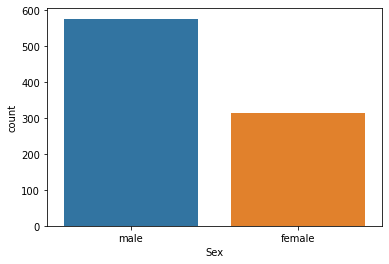

In [108]:
sns.countplot(x='Sex', data=train)

In [109]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

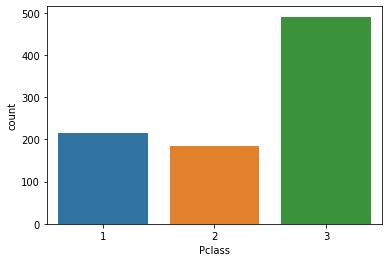

In [110]:
sns.countplot(x='Pclass',data=train)

In [111]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

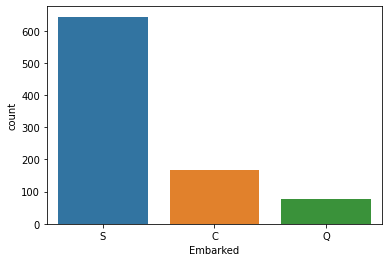

In [112]:
sns.countplot(x='Embarked',data=train)

In [113]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

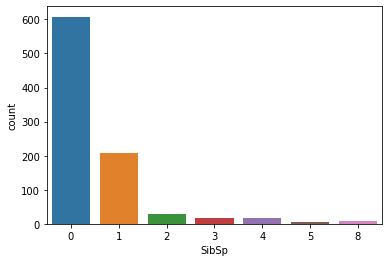

In [114]:
sns.countplot(x='SibSp',data=train)

In [115]:
train['Died'] = 1 - train['Survived']

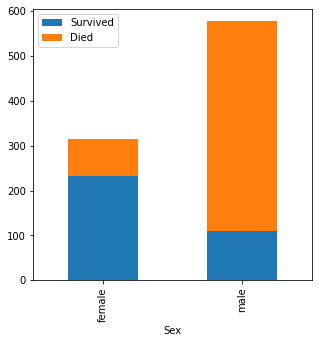

In [116]:
train.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind = 'bar',figsize = (5,5),stacked = True)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


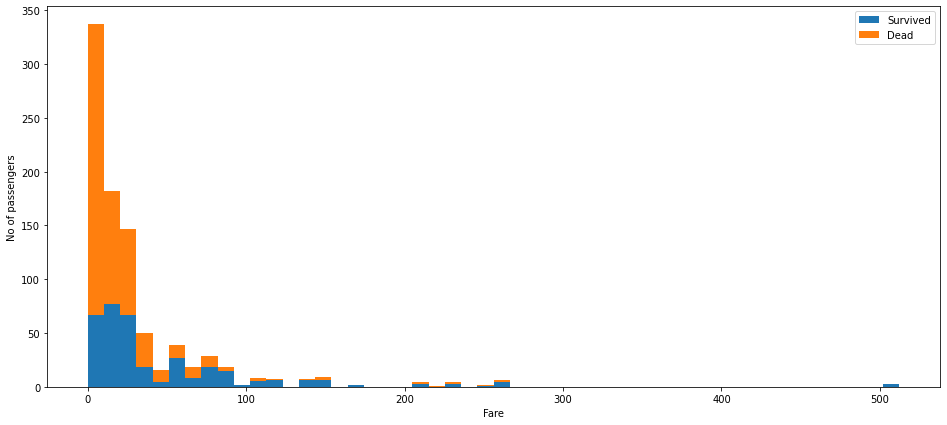

In [117]:
figure = plt.figure(figsize = (16,7))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked = True,bins=50,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

In [118]:
titles = set()
for name in train['Name']:
  titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Rev', 'the Countess', 'Jonkheer', 'Master', 'Don', 'Miss', 'Mr', 'Mlle', 'Dr', 'Col', 'Capt', 'Lady', 'Mrs', 'Ms', 'Major', 'Sir', 'Mme'}


In [119]:
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [120]:
train['Title'] = train['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
train['Title'] = train.Title.map(Title_Dictionary)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [121]:
df1 = train.drop(['Name','Ticket','Died','PassengerId','Cabin'],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [122]:
train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [123]:
df1['Sex'] = df1['Sex'].replace(['male', 'female'], [1,0])
df1['Embarked'] = df1['Embarked'].replace(['S','C','Q'],[0,1,2])
df1['Title'] = df1['Title'].replace(['Miss','Mrs','Mr','Master','Officer','Royalty'],[0,1,2,3,4,5])
df1.head()
df1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,1,27.0,0,0,13.00,0.0,4
887,1,1,0,19.0,0,0,30.00,0.0,0
888,0,3,0,NaN,1,2,23.45,0.0,0
889,1,1,1,26.0,0,0,30.00,1.0,2
890,0,3,1,32.0,0,0,7.75,2.0,2


In [124]:
median_age_men = df1[df1['Sex']==1]['Age'].median()
median_age_women = df1[df1['Sex']==0]['Age'].median()

In [125]:
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age'] = median_age_men 
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age'] = median_age_women 


In [126]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [128]:
df1.dropna(inplace=True)

In [129]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [130]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0.0,2
1,1,1,0,38.0,1,0,71.2833,1.0,1
2,1,3,0,26.0,0,0,7.9250,0.0,0
3,1,1,0,35.0,1,0,53.1000,0.0,1
4,0,3,1,35.0,0,0,8.0500,0.0,2


In [132]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))


In [133]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.364099,0.524184,0.382452,0.062649,0.362205,1.548931
std,0.486260,0.834700,0.477538,0.163160,1.103705,0.806761,0.097003,0.636157,0.969188
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000,1.000000
50%,0.000000,3.000000,1.000000,0.359135,0.000000,0.000000,0.028213,0.000000,2.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000,5.000000


# Model Building and Training

In [137]:
x = df1.drop(['Survived'],axis = 1)
y = df1['Survived']

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [141]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

## Accuracy of the model

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(x_test)
model_accuracy = accuracy_score(y_test,y_pred)

In [148]:
model_accuracy

0.7921348314606742

In [150]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[93, 18],
       [19, 48]])

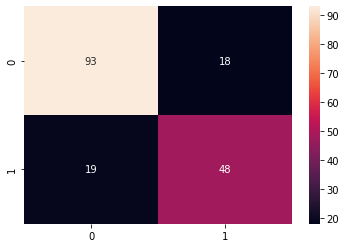

In [151]:
sns.heatmap(cm,annot = True)

# Working on the Test dataset

In [152]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [153]:
titles = set()
for name in test['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Rev', 'Master', 'Miss', 'Mr', 'Dona', 'Col', 'Dr', 'Mrs', 'Ms'}


In [154]:
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(Title_Dictionary)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [155]:
df2 = test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [156]:
df2['Sex'] = df2['Sex'].replace(['male', 'female'], [1,0])
df2['Embarked'] = df2['Embarked'].replace(['S','C','Q'],[0,1,2])
df2['Title'] = df2['Title'].replace(['Miss','Mrs','Mr','Master','Officer','Royalty'],[0,1,2,3,4,5])
df2.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,2.0
1,3,0,47.0,1,0,7.0000,0,1.0
2,2,1,62.0,0,0,9.6875,2,2.0
3,3,1,27.0,0,0,8.6625,0,2.0
4,3,0,22.0,1,1,12.2875,0,1.0


In [157]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [158]:
median_age_men2=df2[df2['Sex']==1]['Age'].median()
median_age_women2=df2[df2['Sex']==0]['Age'].median()

In [159]:
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=median_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=median_age_men2

In [160]:
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [161]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
dtype: int64

In [162]:
df2[df2.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,0,39.0,0,0,108.9,1,NaN


In [163]:
df2 = df2.fillna(2)

In [164]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [165]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,2.0
1,3,0,47.0,1,0,7.0000,0,1.0
2,2,1,62.0,0,0,9.6875,2,2.0
3,3,1,27.0,0,0,8.6625,0,2.0
4,3,0,22.0,1,1,12.2875,0,1.0


In [166]:
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

In [167]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,0.452723,0,0,0.015282,2,2.0
1,3,0,0.617566,1,0,0.013663,0,1.0
2,2,1,0.815377,0,0,0.018909,2,2.0
3,3,1,0.353818,0,0,0.016908,0,2.0
4,3,0,0.287881,1,1,0.023984,0,1.0


In [169]:
pred = clf.predict(df2)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [172]:
predictions_final = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })


In [174]:
predictions_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
